In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [8]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [20]:
Auto = pd.read_csv("Datasets/Auto.csv", na_values=["?"])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [21]:
np.sum(Auto.isna())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [28]:
Auto.dropna(inplace=True)   # need to put inplace = True, to actually change the Auto, otherwise it wouldn't change and just return new dataFrame object
Auto.shape

(392, 9)

# 8(a)

In [29]:
x = pd.DataFrame({"intercept":np.ones(Auto.shape[0]), "horsepower":Auto["horsepower"]})
y = Auto["mpg"]
x, y

(     intercept  horsepower
 0          1.0       130.0
 1          1.0       165.0
 2          1.0       150.0
 3          1.0       150.0
 4          1.0       140.0
 ..         ...         ...
 392        1.0        86.0
 393        1.0        52.0
 394        1.0        84.0
 395        1.0        79.0
 396        1.0        82.0
 
 [392 rows x 2 columns],
 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 392    27.0
 393    44.0
 394    32.0
 395    28.0
 396    31.0
 Name: mpg, Length: 392, dtype: float64)

In [30]:
#results = sm.OLS(y, x).fit() # need to convert categorical variables first into dummy variables, just like how ISLP library handled them, i.e model matrix

# but our X don't have categorical variables, so normally use
results = sm.OLS(y, x).fit()


In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        16:51:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Commenting on above
8)a)
    1)since p value is really close to 0, it has a relationship with the response.
    2) since p value is really really close to 0, it has a strong relationship with the response. Infact, negative coef of horsepower says that as horsepower increases, mpg decreases.
    3) The relationship is negative
    4) The predicted value of mpg is 24.467

In [38]:
results.predict(np.array([1, 98])) # 1 refers to the intercept term

array([24.46707715])

In [40]:
results.get_prediction(np.array([1, 98])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Therefore, confidence interval of 95% is [23.973079, 24.961075] and prediction interval is [14.809396, 34.124758].

# 8(b)

In [48]:
def abline(ax, slope, intercept):
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope* x_vals
    ax.plot(x_vals, y_vals, "r--")

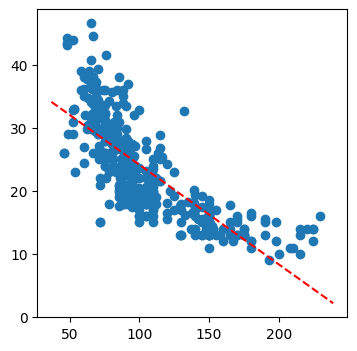

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x[["horsepower"]], y);
abline(ax, results.params[1], results.params[0])

In [45]:
results.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

# 8(c)

Text(0, 0.5, 'Leverage')

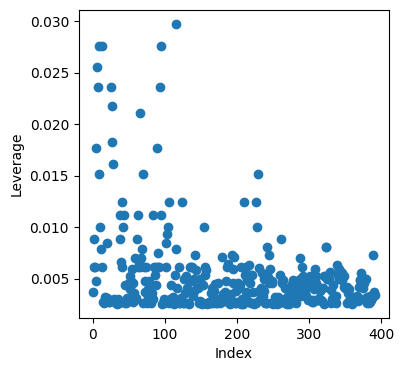

In [50]:
infl = results.get_influence() # leverage statistics
ax = plt.subplots(figsize=(4, 4))[1]
ax.scatter(np.arange(x.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")

In [51]:
residual_err = Auto["mpg"]-results.predict(x)
residual_err

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64

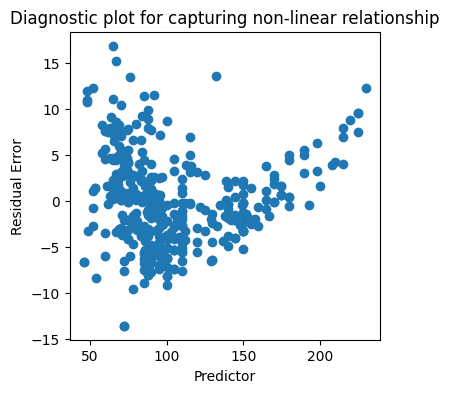

In [57]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x[["horsepower"]], residual_err)
ax.set_xlabel("Predictor")
ax.set_ylabel("Residual Error")
ax.set_title("Diagnostic plot for capturing non-linear relationship");

From above we can conclude that, there is non-linear relationship between the predictor and response.